In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gas_prices = pd.read_csv("/Users/xenokian/Desktop/weekly_prices.csv")

In [3]:
print(gas_prices.head())
print(gas_prices.info())

      week_of  dollars_per_gallon
0  2023-02-13               3.502
1  2023-02-06               3.552
2  2023-01-30               3.594
3  2023-01-23               3.519
4  2023-01-16               3.416
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   week_of             1559 non-null   object 
 1   dollars_per_gallon  1413 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.5+ KB
None


In [4]:
print(gas_prices.isnull().sum())

week_of                 0
dollars_per_gallon    146
dtype: int64


In [5]:
gas_prices['week_of'] = pd.to_datetime(gas_prices['week_of'], errors='coerce')

In [6]:
gas_prices = gas_prices.dropna()

In [7]:
gas_prices = gas_prices.sort_values('week_of')
duplicates = gas_prices[gas_prices.duplicated('week_of', keep=False)]
print("Duplicate dates:")
print(duplicates)

Duplicate dates:
Empty DataFrame
Columns: [week_of, dollars_per_gallon]
Index: []


In [8]:
gas_prices = gas_prices.reset_index(drop=True)

In [9]:
gas_prices['year'] = gas_prices['week_of'].dt.year
gas_prices['month'] = gas_prices['week_of'].dt.month

print(gas_prices.head())
print(gas_prices.info())

     week_of  dollars_per_gallon  year  month
0 1993-04-12               1.079  1993      4
1 1993-04-19               1.079  1993      4
2 1993-04-26               1.086  1993      4
3 1993-05-03               1.086  1993      5
4 1993-05-10               1.097  1993      5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   week_of             1413 non-null   datetime64[ns]
 1   dollars_per_gallon  1413 non-null   float64       
 2   year                1413 non-null   int32         
 3   month               1413 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 33.2 KB
None


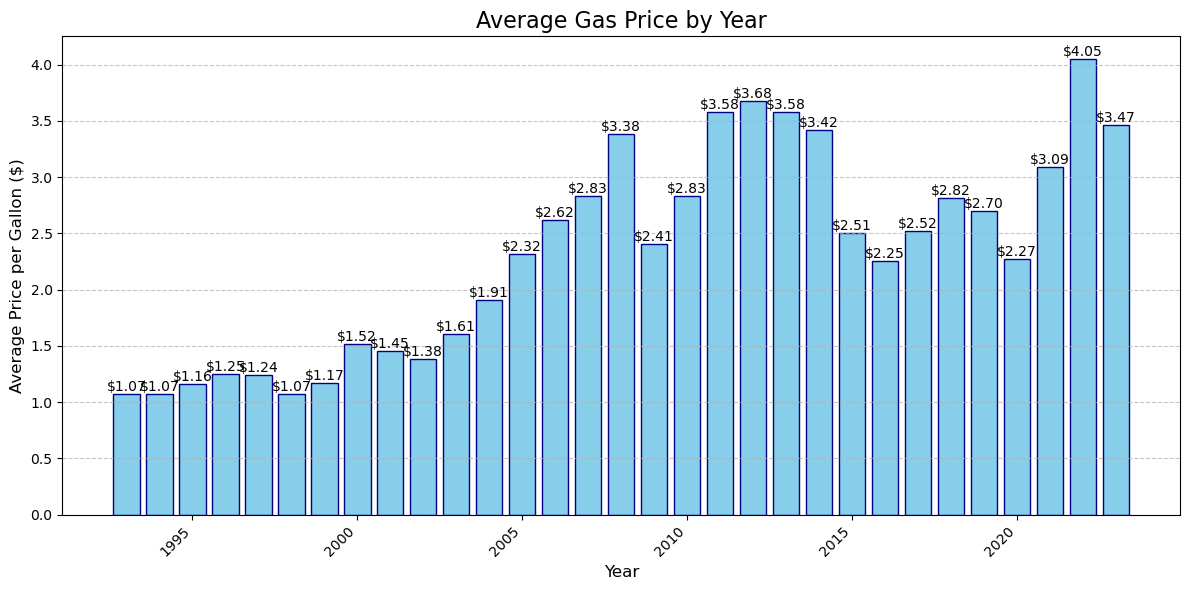

    year  dollars_per_gallon
0   1993            1.071028
1   1994            1.074326
2   1995            1.157776
3   1996            1.247021
4   1997            1.242938
5   1998            1.071229
6   1999            1.172717
7   2000            1.520653
8   2001            1.453875
9   2002            1.382200
10  2003            1.607437
11  2004            1.909864
12  2005            2.320468
13  2006            2.618696
14  2007            2.829652
15  2008            3.383732
16  2009            2.409844
17  2010            2.833894
18  2011            3.583702
19  2012            3.679816
20  2013            3.582780
21  2014            3.416750
22  2015            2.505333
23  2016            2.252875
24  2017            2.518163
25  2018            2.819109
26  2019            2.700630
27  2020            2.272745
28  2021            3.087438
29  2022            4.049878
30  2023            3.468571


In [10]:
yearly_avg = gas_prices.groupby('year')['dollars_per_gallon'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.bar(yearly_avg['year'], yearly_avg['dollars_per_gallon'], color='skyblue', edgecolor='navy')

plt.title('Average Gas Price by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price per Gallon ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(yearly_avg['dollars_per_gallon']):
    plt.text(yearly_avg['year'][i], v, f'${v:.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()


print(yearly_avg)